<a href="https://colab.research.google.com/github/ALM1808/ALM1808/blob/main/PROYECTOML_GYM_rev5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo:**
Analizar los hábitos de entrenamiento y las métricas de rendimiento de personas que entrenan.
Con estos datos construir modelos predictivos para la progresión de la condición física y el gasto calórico,
Para ello se realizan investigaciones sobre la variabilidad de la frecuencia cardiaca, el IMC y la intensidad del ejercicio, en base a sexo y edad.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV




df = pd.read_csv('/content/gym_members_exercise_tracking.csv')
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Edad: Edad del miembro del gimnasio.
Sexo: Sexo del miembro del gimnasio (Masculino o Femenino).
Peso (kg): Peso del socio en kilogramos.
Altura (m): Altura del miembro en metros.
Max_BPM: Frecuencia cardíaca máxima (pulsaciones por minuto) durante las sesiones de entrenamiento.
Avg_BPM: Frecuencia cardíaca media durante las sesiones de entrenamiento.
Resting_BPM: Frecuencia cardiaca en reposo antes del entrenamiento.
Duración_sesión (horas): Duración de cada sesión de entrenamiento en horas.
Calorías quemadas: Total de calorías quemadas durante cada sesión.
Tipo_entrenamiento: Tipo de entrenamiento realizado (por ejemplo, cardio, fuerza, yoga, HIIT).
Porcentaje de grasa: Porcentaje de grasa corporal de la persona.
Ingesta_de_agua (litros): Consumo diario de agua durante los entrenamientos.
Frecuencia_de_entrenamiento (días/semana): Número de sesiones de entrenamiento por semana.
Nivel_de_experiencia: Nivel de experiencia, de principiante (1) a experto (3).
IMC: Índice de masa corporal, calculado a partir de la altura y el peso.



In [ ]:
df.shape

(973, 15)

**EDA**

In [ ]:
df.dtypes

,0
Age,int64
Gender,object
Weight (kg),float64
Height (m),float64
Max_BPM,int64
Avg_BPM,int64
Resting_BPM,int64
Session_Duration (hours),float64
Calories_Burned,float64
Workout_Type,object


In [ ]:
# Estadísticas descriptivas
print(df.describe().T)


                               count        mean         std     min     25%  \
Age                            973.0   38.683453   12.180928   18.00   28.00   
Weight (kg)                    973.0   73.854676   21.207500   40.00   58.10   
Height (m)                     973.0    1.722580    0.127720    1.50    1.62   
Max_BPM                        973.0  179.883864   11.525686  160.00  170.00   
Avg_BPM                        973.0  143.766701   14.345101  120.00  131.00   
Resting_BPM                    973.0   62.223022    7.327060   50.00   56.00   
Session_Duration (hours)       973.0    1.256423    0.343033    0.50    1.04   
Calories_Burned                973.0  905.422405  272.641516  303.00  720.00   
Fat_Percentage                 973.0   24.976773    6.259419   10.00   21.30   
Water_Intake (liters)          973.0    2.626619    0.600172    1.50    2.20   
Workout_Frequency (days/week)  973.0    3.321686    0.913047    2.00    3.00   
Experience_Level               973.0    

In [ ]:
print(df.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


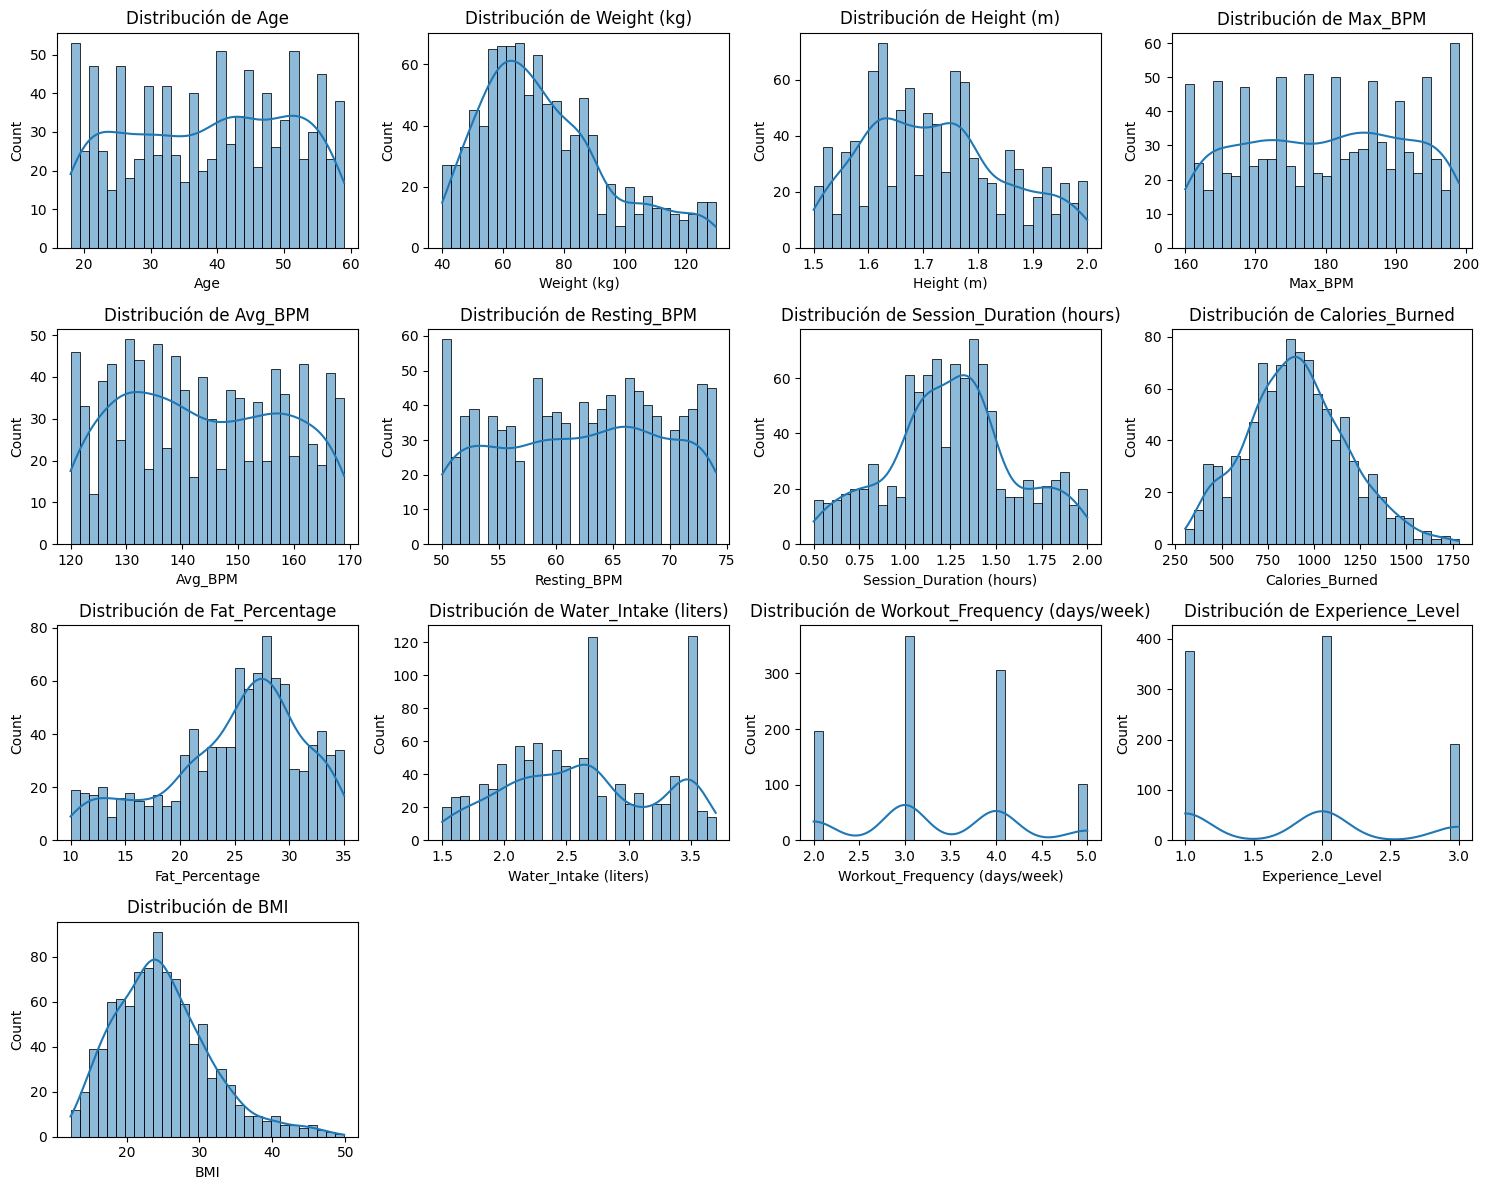

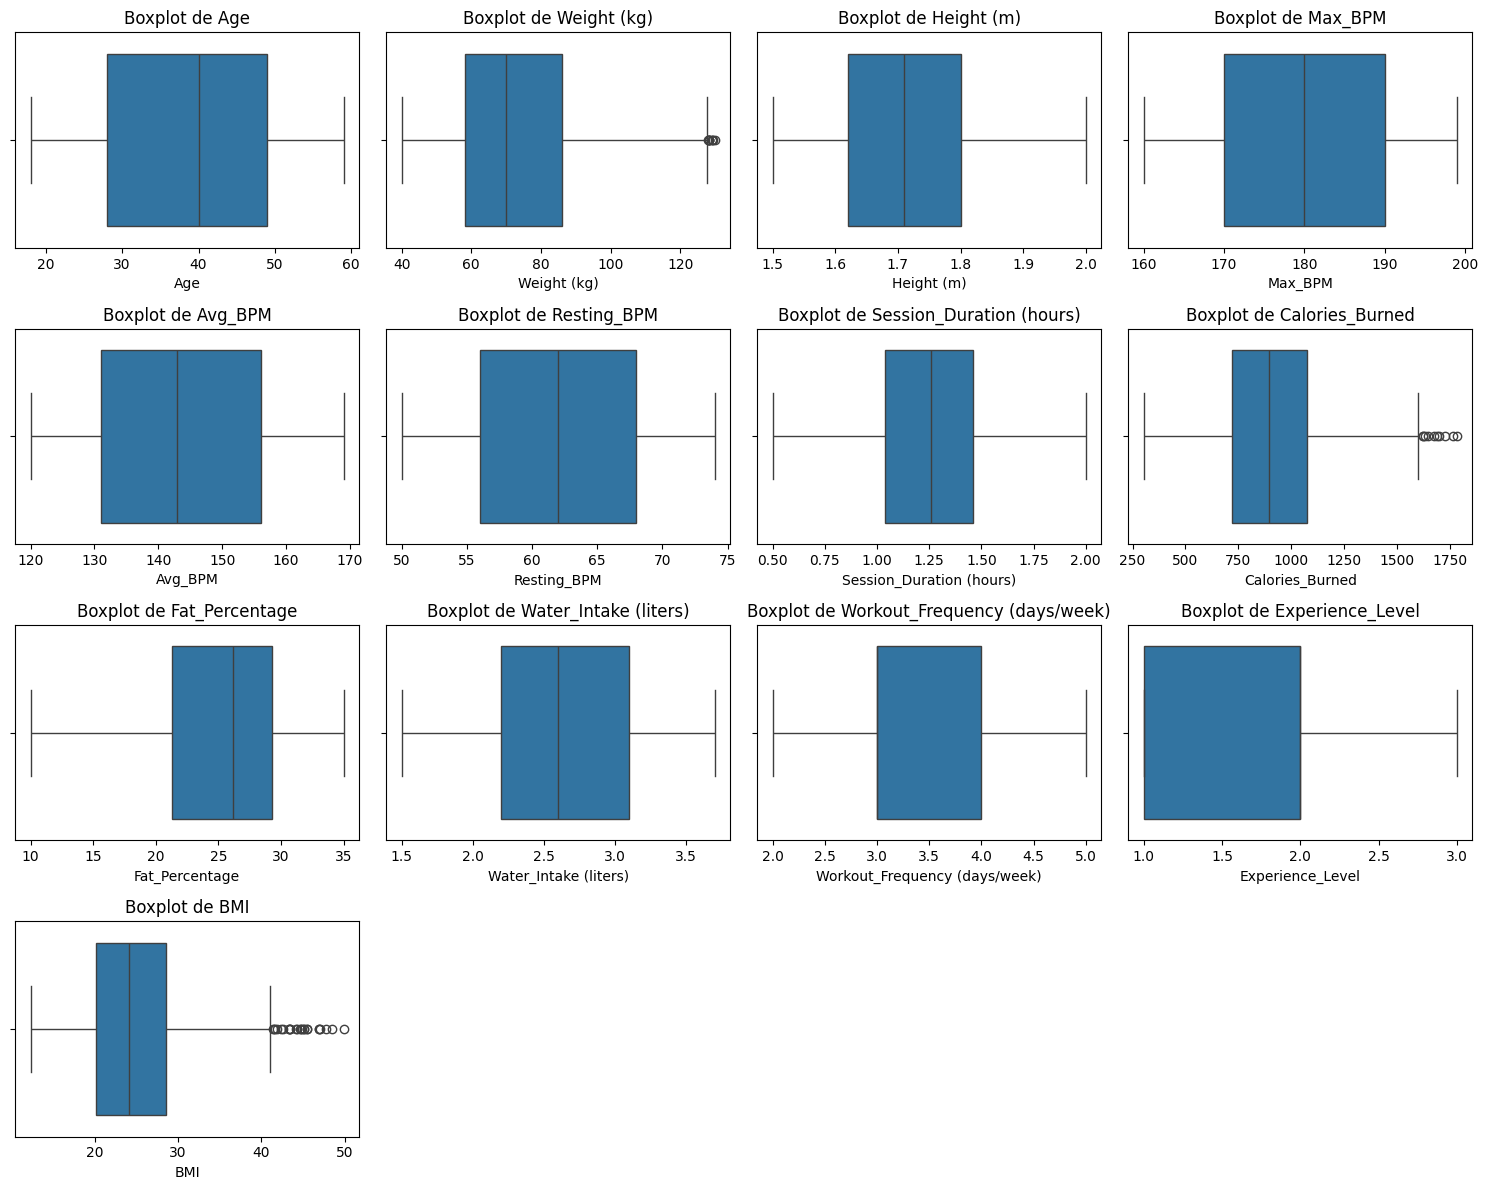

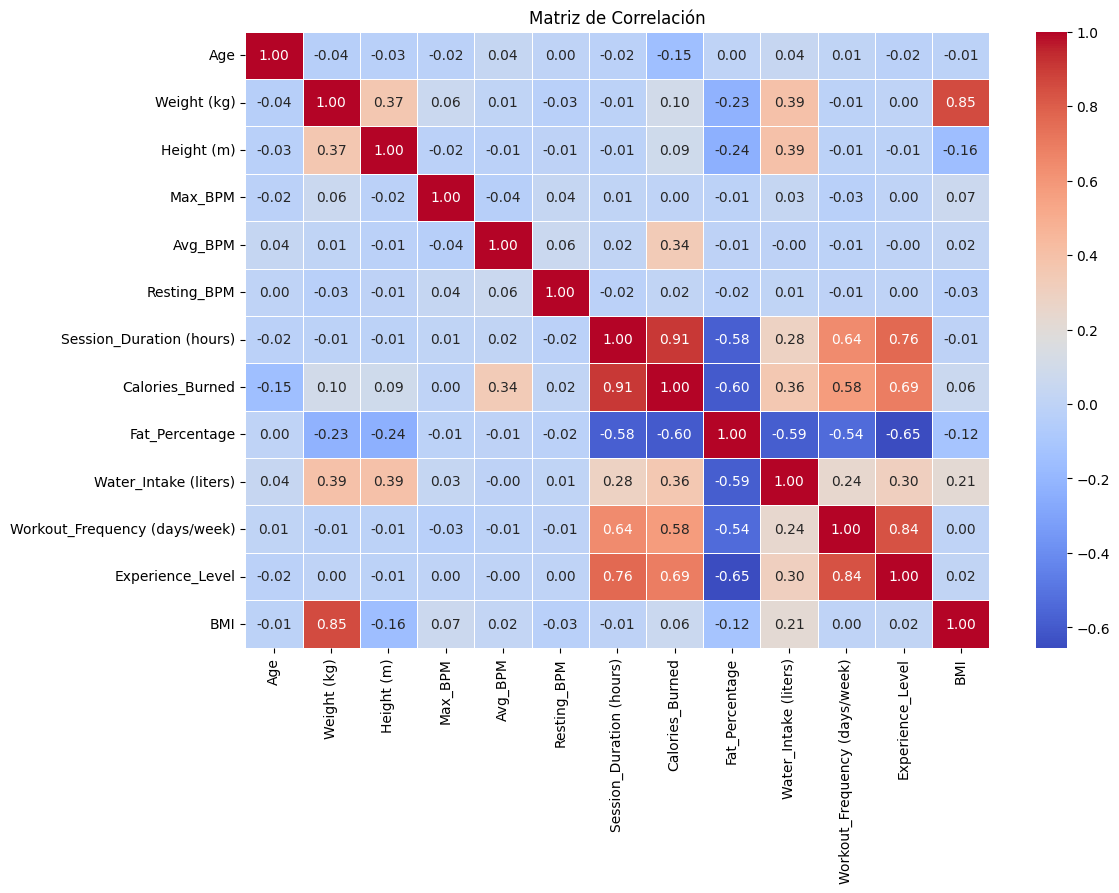

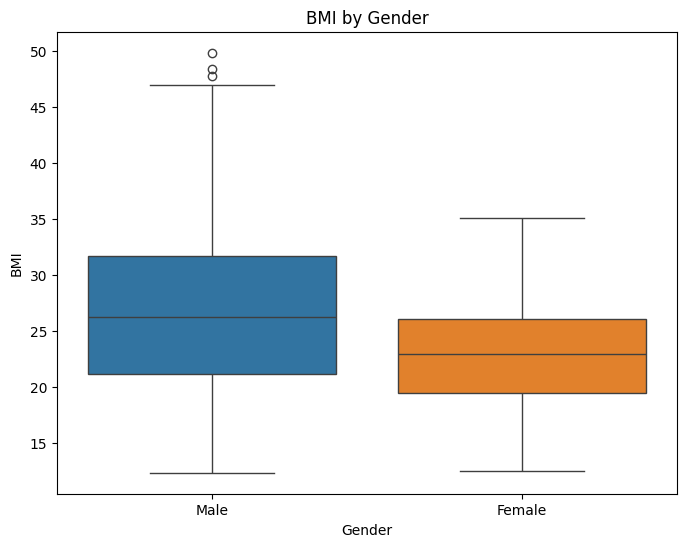

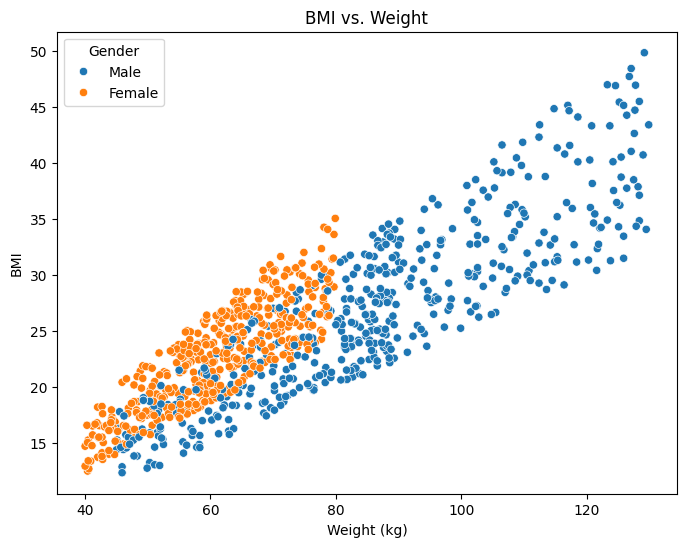

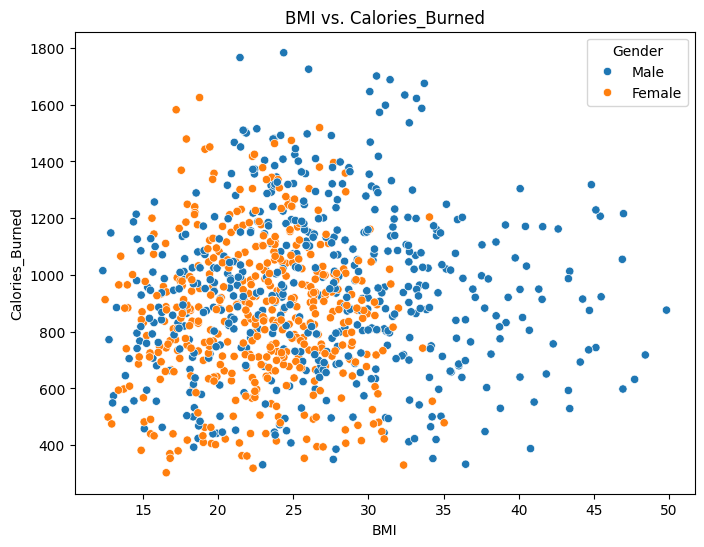

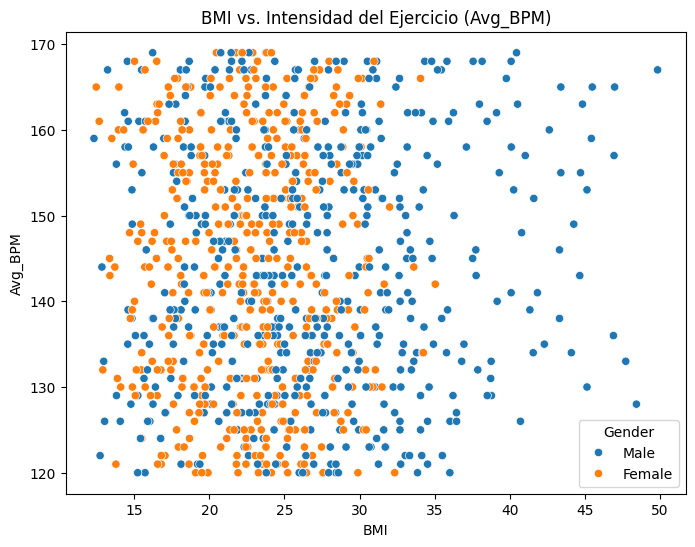

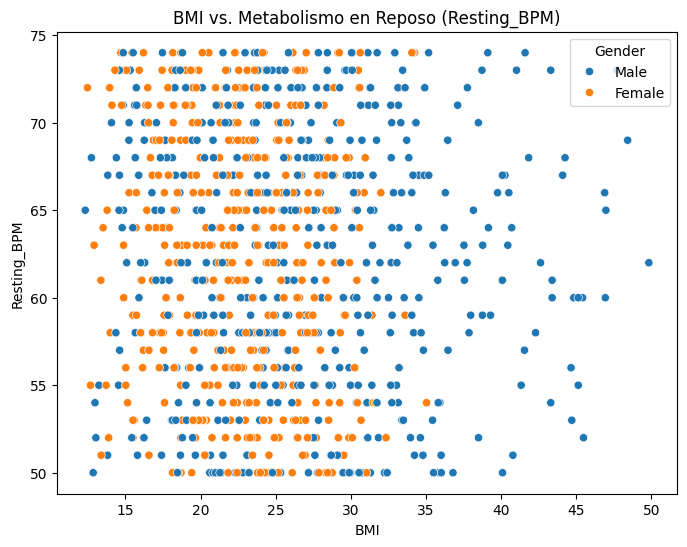

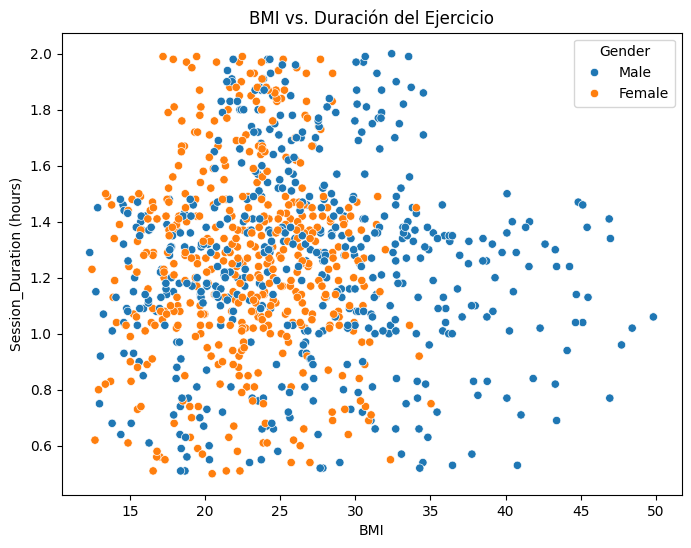

Parejas de variables con alta correlación:
                      Variable 1                     Variable 2  Correlación
0                    Weight (kg)                            BMI     0.853158
1       Session_Duration (hours)                Calories_Burned     0.908140
2       Session_Duration (hours)               Experience_Level     0.764768
3                Calories_Burned       Session_Duration (hours)     0.908140
4  Workout_Frequency (days/week)               Experience_Level     0.837079
5               Experience_Level       Session_Duration (hours)     0.764768
6               Experience_Level  Workout_Frequency (days/week)     0.837079
7                            BMI                    Weight (kg)     0.853158


In [ ]:
# Revisión de distribuciones de variables ---
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# Detección de valores atípicos con Boxplots ---
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# --- 3. Análisis de correlación entre variables ---
plt.figure(figsize=(12, 8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x = 'Gender', y = 'BMI', data = df, hue = 'Gender')
plt.title('BMI by Gender')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Weight (kg)', y = 'BMI', data = df, hue='Gender',legend='auto')
plt.title('BMI vs. Weight')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x = 'BMI',y='Calories_Burned', data = df, hue = 'Gender', legend='auto')
plt.title('BMI vs. Calories_Burned')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='BMI', y='Avg_BPM', data=df, hue='Gender', legend='auto')
plt.title('BMI vs. Intensidad del Ejercicio (Avg_BPM)')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='BMI', y='Resting_BPM', data=df, hue='Gender', legend='auto')
plt.title('BMI vs. Metabolismo en Reposo (Resting_BPM)')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='BMI', y='Session_Duration (hours)', data=df, hue='Gender', legend='auto')
plt.title('BMI vs. Duración del Ejercicio')
plt.show()

# Mostrar las correlaciones más altas
correlation_threshold = 0.7  # Se puede ajustar
high_corr = corr_matrix[(corr_matrix > correlation_threshold) & (corr_matrix < 1.0)]
print("Parejas de variables con alta correlación:")
print(high_corr.stack().reset_index().rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlación'}))


**Algunas** **conclusiones**

Las personas con mayor BMI podrían realizar entrenamientos más cortos debido a:
Menor capacidad aeróbica.
Fatiga más rápida.
Estrategias de entrenamiento diferentes.

El metabolismo en reposo puede estar más influenciado por el sexo, edad y nivel de entrenamiento que por el BMI.

**PREPROCESAMIENTO DE DATOS**

In [ ]:
# Definir la categoría de grasa corporal según género
def categorize_fat_percentage(row):
    fat = row['Fat_Percentage']
    gender = row['Gender']  # Suponiendo que Gender es 0 = Male, 1 = Female

    if gender == 0:  # Varones
        if 10 <= fat < 20:
            return 'Normal'
        elif 20 <= fat < 25:
            return 'Sobrepeso'
        elif fat >= 25:
            return 'Obeso'
        else:
            return 'Undefined'  # Para valores inesperados

    elif gender == 1:  # Mujeres
        if 20 <= fat < 30:
            return 'Normal'
        elif 30 <= fat < 35:
            return 'Sobrepeso'
        elif fat >= 35:
            return 'Obesa'
        else:
            return 'Undefined'



In [ ]:
print(df.columns)


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')


In [ ]:
# --- 1. Identificación de columnas categóricas y numéricas ---
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ✅ Guardar `Fat_Percentage` antes de modificar `df`
y = df['Fat_Percentage'].copy()

# ❌ Asegurar que `Fat_Percentage` no esté en las variables numéricas
if "Fat_Percentage" in numerical_cols:
    numerical_cols.remove("Fat_Percentage")

# ❌ Eliminar `Fat_Percentage` de `df` antes de preprocesar
df = df.drop(columns=['Fat_Percentage'])

# --- 2. Transformación de variables categóricas con OneHotEncoder ---
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

# ✅ Ajustar el preprocesador solo con las características de entrada (sin `Fat_Percentage`)
preprocessor.fit(df)

# Guardar el preprocesador corregido
joblib.dump(preprocessor, "preprocessor.pkl")
print("✅ Preprocesador corregido y guardado sin `Fat_Percentage`.")

# 🚨 No transformar `df` todavía, porque aún necesitamos crear nuevas características
# Transformación se aplicará después de crear las nuevas características

# --- 3. Creación de nuevas características ---
df['Heart_Rate_Diff'] = df['Max_BPM'] - df['Resting_BPM']
df['Calories_per_Hour'] = df['Calories_Burned'] / (df['Session_Duration (hours)'] + 1e-5)
df['Weight_Height_Ratio'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)
df['Effort_Ratio'] = df['Avg_BPM'] / df['Max_BPM']
df['Hydration_Level'] = df['Water_Intake (liters)'] / df['Weight (kg)']
df['Activity_Index'] = df['Workout_Frequency (days/week)'] * df['Session_Duration (hours)']
df['Experience_Activity_Ratio'] = df['Experience_Level'] / (df['Workout_Frequency (days/week)'] + 1)

# 🚨 AHORA aplicamos la transformación del preprocesador
df_transformed = preprocessor.transform(df)

# Obtener nombres de las columnas transformadas
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = list(categorical_feature_names) + numerical_cols  # Mantener las numéricas

# Crear un nuevo DataFrame con nombres restaurados
df = pd.DataFrame(df_transformed, columns=all_feature_names)

# --- 4. Tratamiento de valores nulos ---
df.fillna(df.median(numeric_only=True), inplace=True)

# --- 5. Normalización de datos ---
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
joblib.dump(scaler, "scaler.pkl")

# --- 6. Selección de características ---
X = df  # ✅ `Fat_Percentage` ya fue eliminado antes

selector = RandomForestRegressor(n_estimators=100, random_state=42)
selector.fit(X, y)
feature_importances = pd.Series(selector.feature_importances_, index=X.columns)
selected_features = feature_importances[feature_importances > 0.01].index.tolist()
X = X[selected_features]

# ✅ Guardar el DataFrame corregido para la app
X.to_csv("processed_data.csv", index=False)
print("✅ Datos corregidos guardados correctamente.")

✅ Preprocesador corregido y guardado sin `Fat_Percentage`.
✅ Datos corregidos guardados correctamente.


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros para RandomForest: {'n_estimators': 300, 'max_depth': 10}
Mejores parámetros para GradientBoosting: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
Mejores parámetros para XGBoost: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}

Resultados para RandomForest:
MAE: 2.3930
MSE: 7.8522
R² Score: 0.8019


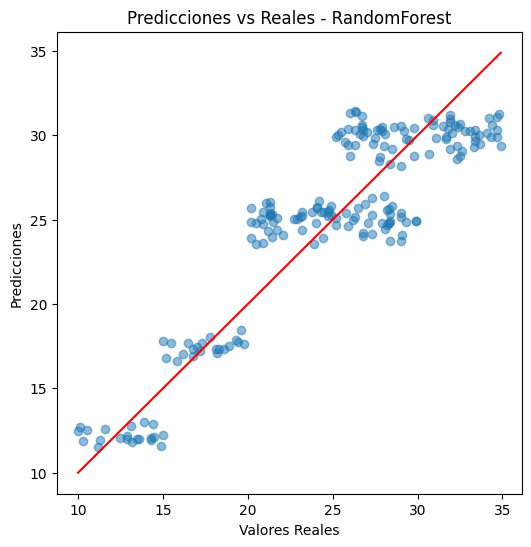


Resultados para GradientBoosting:
MAE: 2.4269
MSE: 7.9845
R² Score: 0.7985


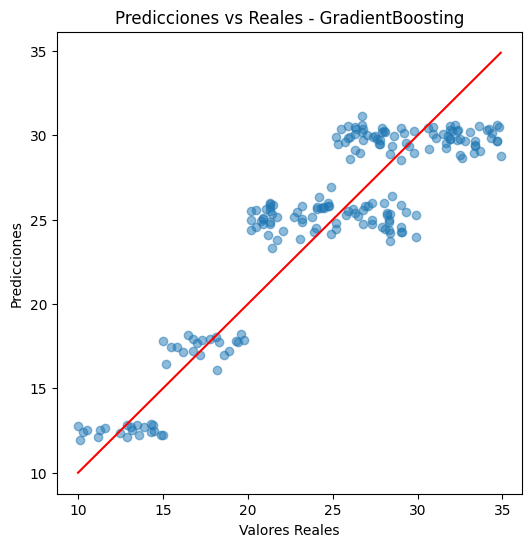


Resultados para XGBoost:
MAE: 2.4325
MSE: 8.0158
R² Score: 0.7978


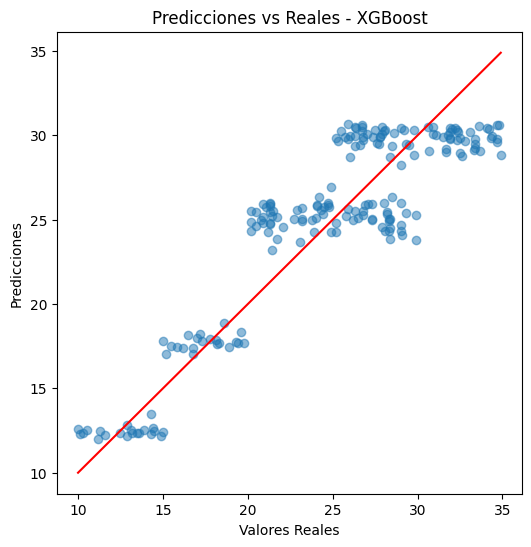

✅ El mejor modelo guardado es RandomForest con R² = 0.8019


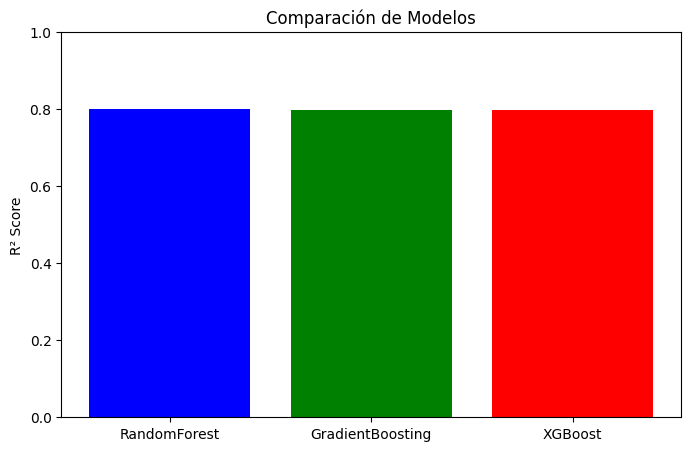

In [ ]:
# --- 6. Selección de características ---
selector = RandomForestRegressor(n_estimators=100, random_state=42)
selector.fit(X, y)
feature_importances = pd.Series(selector.feature_importances_, index=X.columns)
selected_features = feature_importances[feature_importances > 0.01].index.tolist()

# ✅ Evitar que `X` quede vacío si ninguna característica supera el umbral
if len(selected_features) == 0:
    print("⚠️ No se encontraron características con importancia > 0.01. Se mantendrán todas las características.")
    selected_features = X.columns.tolist()

X = X[selected_features]

# --- 7. División en datos de entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 8. Definir modelos ---
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
}

# --- 9. Definir hiperparámetros para RandomizedSearchCV ---
param_distributions = {
    'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'GradientBoosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 10]},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 10]}
}

# --- 10. Búsqueda de hiperparámetros ---
best_models = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    search = RandomizedSearchCV(model, param_distributions[name], n_iter=10, cv=kf, scoring='r2', n_jobs=-1, random_state=42)
    search.fit(X_train, y_train)
    best_models[name] = search.best_estimator_
    print(f"Mejores parámetros para {name}: {search.best_params_}")

# --- 11. Evaluación de Modelos ---
best_model_name = None
best_r2 = -np.inf

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"\nResultados para {name}:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"R² Score: {r2:.4f}")

    # Visualizar predicciones vs reales
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Valores Reales")
    plt.ylabel("Predicciones")
    plt.title(f"Predicciones vs Reales - {name}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
    plt.show()

    # Seleccionar el mejor modelo basado en R²
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name

# ✅ Guardar el mejor modelo encontrado
best_model = best_models[best_model_name]
joblib.dump(best_model, "best_model.pkl")
print(f"✅ El mejor modelo guardado es {best_model_name} con R² = {best_r2:.4f}")

# ✅ Comparar desempeño de los modelos
r2_scores = {name: r2_score(y_test, model.predict(X_test)) for name, model in best_models.items()}

plt.figure(figsize=(8,5))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'green', 'red'])
plt.ylabel("R² Score")
plt.title("Comparación de Modelos")
plt.ylim(0, 1)  # Escala entre 0 y 1 para mejor visualización
plt.show()